# To. 팀원즈.. 

```
‘공공도서관 프로그램'으로 검색했을 때... 

문제 1. 키워드가 들어간 트윗 자체가 많이 없음 
-> ‘지역+도서관' 으로 추가 검색해보면 더 많은 자료가 나올 것 가틈. 

문제 2. 도서관 측에서 뿌린 홍보자료가 넘 많이 나옴 
-> 좋아요가 아예 없는 트윗은 삭제하니까 ㄱㅊ았음... 다른 검색키워드로는 어떨지 모르겠네여

```

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 트윗을 긁어와서 넣어놓을 리스트 생성
tweets_list = []

# TwitterSearchScraper를 이용하여 해당 트윗을 긁어와서 리스트에 넣기 ('검색어 since:시작날짜 until:끝나는날짜')
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('노인 필요 since:2020-01-01 until:2022-08-20').get_items()):
    if i > 10000:
        break
    tweets_list.append([tweet.date, tweet.content, tweet.likeCount])
    
# 다 긁어왔다면 데이터 프레임으로 저장시키기
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'content', 'Like'])
tweets_df

,Datetime,content,Like
0,2022-08-19 17:55:59+00:00,@dud61755 @emerald2010328 노인복지 대국민 사기질 한 국짐당 ...,3
1,2022-08-19 07:23:20+00:00,나 분명 개그캐 전문으로 내던 여자인데 기력없다고 성커만 뛰었더니(들어보셈. 얘네 ...,3
2,2022-08-18 14:27:38+00:00,나는 피곤했다. 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까? 어린아이나 강아지...,0
3,2022-08-17 23:38:57+00:00,"윤석명 ＂노인 소득양극화 심각, 동일연금제도 필요＂ (출처 : 아이뉴스24 | 네이...",0
4,2022-08-17 22:27:36+00:00,나는 피곤했다. 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까? 어린아이나 강아지...,0
...,...,...,...
1656,2020-01-03 16:27:34+00:00,나는 피곤했다. 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까? 어린아이나 강아지...,0
1657,2020-01-03 13:34:27+00:00,"&lt;의궤, 8일간의 축제&gt;에서 기억에 남는 통찰은\n\n뒤주에 갖혀 8일만...",0
1658,2020-01-02 11:46:44+00:00,딱히 노인들만의 속성은 아닌데.. 유명인 보면 악수하고 싶고 사진 찍고 싶고 말 붙...,3
1659,2020-01-01 05:38:22+00:00,같이 늙어가며 웃을 사람들이 있다는 걸 잊지 말자. 그 누구도 보지 못했던 멋쟁이 ...,3


In [ ]:
tweets_df = tweets_df.drop_duplicates(subset='Text')

In [3]:
#여러 키워드로 검색 많이 해봐야 할 것 같아서 '검색결과+시작월일+끝나는월일+'의 형식으로 파일 저장했음
tweets_df.to_csv('노인 필요 20200101_20220820.csv', encoding="utf-8-sig", index=False)

In [ ]:
pip install tqdm

In [4]:
import pandas as pd
import multiprocessing
import numpy as np
from collections import defaultdict
from tqdm import trange
import re
import numpy as np
from collections import defaultdict


data = pd.read_csv('노인 필요 20200101_20220820.csv',engine='python',encoding='utf-8-sig')
del data['Like']
data

,Datetime,content
0,2022-08-19 17:55:59+00:00,@dud61755 @emerald2010328 노인복지 대국민 사기질 한 국짐당 ...
1,2022-08-19 07:23:20+00:00,나 분명 개그캐 전문으로 내던 여자인데 기력없다고 성커만 뛰었더니(들어보셈. 얘네 ...
2,2022-08-18 14:27:38+00:00,나는 피곤했다. 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까? 어린아이나 강아지...
3,2022-08-17 23:38:57+00:00,"윤석명 ＂노인 소득양극화 심각, 동일연금제도 필요＂ (출처 : 아이뉴스24 | 네이..."
4,2022-08-17 22:27:36+00:00,나는 피곤했다. 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까? 어린아이나 강아지...
...,...,...
1656,2020-01-03 16:27:34+00:00,나는 피곤했다. 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까? 어린아이나 강아지...
1657,2020-01-03 13:34:27+00:00,"&lt;의궤, 8일간의 축제&gt;에서 기억에 남는 통찰은\n\n뒤주에 갖혀 8일만..."
1658,2020-01-02 11:46:44+00:00,딱히 노인들만의 속성은 아닌데.. 유명인 보면 악수하고 싶고 사진 찍고 싶고 말 붙...
1659,2020-01-01 05:38:22+00:00,같이 늙어가며 웃을 사람들이 있다는 걸 잊지 말자. 그 누구도 보지 못했던 멋쟁이 ...


In [5]:
# Basic Cleaning Text Function
def Twitter_use_only(readData, Num=False, Eng=False):
    list_text = []
    
    for i in trange(len(data['content'])):
        
        pre_text = data['content'][i]
        # Retweets 제거
        text = re.sub('RT @[\w_]+: ', '', pre_text)

        # enticons 제거
        text = re.sub('@[\w_]+', '', text)

        # URL 제거
        text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
        text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    #     pattern = '(http|ftp|https)://(?:[-\w.]|(?:\da-fa-F]{2}))+'
    #     text = re.sub(pattern = pattern, repl = ' ',string=text)

        # Hashtag 제거
        text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

        # 쓰레기 단어 제거
        text = re.sub('[&]+[a-z]+', ' ', text)

        # 특수문자 제거
        text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)

        # 띄어쓰기 제거
        text = text.replace('\n',' ')

        if Num is True:
            # 숫자 제거
            text = re.sub(r'\d+',' ',text)

        if Eng is True:
            # 영어 제거 
            text = re.sub('[a-zA-Z]' , ' ', text)

        # 정리
        text = ' '.join(text.split())
        list_text.append(text)
    
#         print(list_text)

    del data['content']
    
    return list_text
# 문장 단어별 split
def WordList(data):
    f_list = []
    
    data['text'] = data['text'].astype(str)
    
    for i in trange(len(data)):
        f_list.append(data['text'][i].split())
    
    return f_list

text = Twitter_use_only(data)

text_df = pd.DataFrame(text)
data_df = pd.concat([data,text_df],axis=1)
data_df.columns = ['tweet_date', 'text']

data_df_reset = data_df.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████| 1661/1661 [00:00<00:00, 7584.17it/s]


In [6]:
data_df_reset

,tweet_date,text
0,2022-08-19 17:55:59+00:00,노인복지 대국민 사기질 한 국짐당 과 김건희 대통령은 필요 없다
1,2022-08-19 07:23:20+00:00,나 분명 개그캐 전문으로 내던 여자인데 기력없다고 성커만 뛰었더니 들어보셈 얘네 합...
2,2022-08-18 14:27:38+00:00,나는 피곤했다 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까 어린아이나 강아지라면...
3,2022-08-17 23:38:57+00:00,윤석명 노인 소득양극화 심각 동일연금제도 필요 출처 아이뉴스24 네이버 뉴스
4,2022-08-17 22:27:36+00:00,나는 피곤했다 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까 어린아이나 강아지라면...
...,...,...
1656,2020-01-03 16:27:34+00:00,나는 피곤했다 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까 어린아이나 강아지라면...
1657,2020-01-03 13:34:27+00:00,의궤 8일간의 축제 에서 기억에 남는 통찰은 뒤주에 갖혀 8일만에 숨을 거둔 사도 ...
1658,2020-01-02 11:46:44+00:00,딱히 노인들만의 속성은 아닌데 유명인 보면 악수하고 싶고 사진 찍고 싶고 말 붙이고...
1659,2020-01-01 05:38:22+00:00,같이 늙어가며 웃을 사람들이 있다는 걸 잊지 말자 그 누구도 보지 못했던 멋쟁이 노...


In [7]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()



import sys

o_ll = []
for i in trange(len(ll_list)):
    real_text = okt.normalize(ll_list[i])
    o_ll.append(real_text)
result = ' '.join(o_ll)
result

100%|██████████████████████████████████████████████████████████████████████████████| 1661/1661 [00:34<00:00, 48.75it/s]


'노인복지 대국민 사기질 한 국짐당 과 김건희 대통령은 필요 없다 나 분명 개그캐 전문으로 내던 여자인데 기력없다고 성커만 뛰었더니 들어보셈 얘네 합격컷 개낮아서 로그 그릴 필요가 없엇음 커뮤에서 개그 어떻게치는지 까먹음 나는 피곤했다 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까 어린아이나 강아지라면 이렇게 예의를 차릴 필요가 없으니 훨씬 나았을 것이다 윤석명 노인 소득양극화 심각 동일연금제도 필요 출처 아이뉴스24 네이버 뉴스 나는 피곤했다 노인들은 왜 이렇게 사람을 부담스럽게 하는 걸까 어린아이나 강아지라면 이렇게 예의를 차릴 필요가 없으니 훨씬 나았을 것이다 그정도로 가져올 필요는 없어요 샥샥 빼드림 근데 일정이 딱히 정해져있는게 확실하지않아서 뭘챙겨야할지 진짜 막연해요 덩그러니 그럼 다음은 저기 있는 노인네들을 죽여볼래 노동력도 없는 놈들은 제국에 필요 없잖아 노인빈곤율 엄청 심하고 분단국가이며 세계꼴찌출산율에 이민 올 사람들이 과연 더욱 늘어날까 싶기도하고 그리고 출산율이 떨어지는데 승자가 어딨음 그냥 남자나 여자나 둘다 패배자지 ㅋㅋㅋ 뭔 누가 이겼고 누가 졌고 이게 뭔 필요야 그리고 국제결혼이 뭔 누구나 쉽나 ㅋㅋㅋ 덧붙이자면 이것은 제 사견이지만 과연 2찍들에게 민주주의랍시고 투표권을 줄 필요가 있을까 아직도 정신 못차리고 그저 먹고 살게만 해줘서 감사하다며 박정희 독재 시절을 그리워하는 2찍 노인들과 본인의 분노를 약자에게 풀고 그들을 억압할 수 있다면 얼마든지 표를 주겠다는 2찍 젊은이들 젠장할 노인네 맞아요 맞아요 맞아요 그리고 앞으로도 또 그럴 겁니다 이것만은 아주 그냥 기억해두세요 나는요 이 빌어먹을 놈의 수업 필요 없어 막2장 엉티븐 나 진짜 소통단절의 아이콘으로써 커뮤같은데 어디도 들어가본 적 없어 익무 첨들어봤 요즘 보는 매체 다 달라져서 더욱 대화편차 심해졌단 트잇 엊그제 본거같은데 노력 할 필요가 있겠다 진짜 10년뒤엔 골방노인 돼서 혼자서 2002월드컵이 어쨌니 그럴까 걱정된다 그렇다면 굳이 내 배게를 가져가야하는 이유가 

In [8]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [9]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
print(len(df))
df[:20]

5898


,index,cnt
0,노인,1868
1,필요,1705
2,사람,486
3,생각,189
4,라면,186
5,예의,182
6,부담,181
7,강아지,174
8,그냥,120
9,당신,103


In [10]:
df.cnt.unique()

array([1868, 1705,  486,  189,  186,  182,  181,  174,  120,  103,   93,
         92,   90,   88,   86,   85,   82,   81,   78,   74,   73,   67,
         65,   64,   62,   60,   59,   57,   54,   53,   52,   51,   50,
         49,   48,   47,   46,   45,   44,   43,   42,   41,   40,   39,
         38,   37,   36,   35,   34,   33,   32,   31,   30,   29,   28,
         27,   26,   25,   24,   23,   22,   21,   20,   19,   18,   17,
         16,   15,   14,   13,   12,   11,   10,    9,    8,    7,    6,
          5,    4,    3,    2,    1], dtype=int64)

In [11]:
df_test= df[(df['cnt'] > 30)]
len(df_test)

94

In [12]:
df_test= df[df['cnt'] > 30]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 
df_stop_words = df_test.head(50) # 50번째로 많이 등장한 단어까지는 삭제(제가 임의로 정한 숫자라서 크롤링 결과 한번 확인해보시고 수정하시기..)
df_stop_words = df_stop_words['index'].tolist()

In [13]:
with open('stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')



for i in stop_words:
    df_stop_words.append(i)
    
add_stop = ['머리', '할아버지', '기억', '오늘', '여자', '박사','서비스', '때문', '진짜', '문제', '지금', '이유', '이제 ', '빌어먹을', '젠장', '꼰대', '장난', '위해','영감', '엉티븐', '달링', '대한', '도둑', '여보', '허니', '치료', '소리', '영정', '지원']

for a in add_stop:
    df_stop_words.append(a)

In [14]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in df_stop_words:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [15]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df_end = pd.DataFrame(series, columns=['cnt'])

df_end = df_end.reset_index()
df_end[:30]

,index,cnt
0,정책,42
1,장애인,41
2,가장,40
3,정부,40
4,백신,40
5,사실,39
6,세상,39
7,독거,39
8,연금,39
9,진자,39


(-0.5, 3999.5, 2999.5, -0.5)

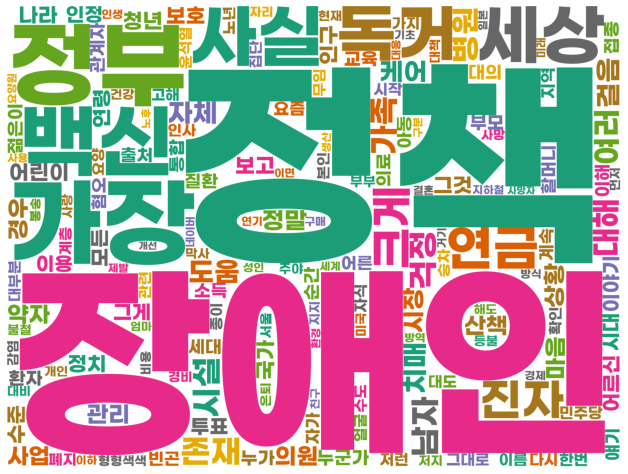

In [16]:
from wordcloud import WordCloud
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=161).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [ ]:
[계층 수요]
# 뉴스 키워드로 '계층' + '뉴스키워드' or ' 광범위한 키워드' --> 트위터 검색 
# 트위터로 계속 단어 전처리 
# 의미있는 단어 나오면 내용 살피고, 의미 있는 단어들이 워드클라우드에 많이 나오면 걔로 프로그램 인사이트 



# 데이터 너무 많으면 밑에 코드

In [ ]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()


list_1 = ll_list[:277374]
list_2 = ll_list[277374:]

import sys

o_ll = []
for i in trange(len(list_1)):
    o_ll.append(okt.nouns(list_1[i]))
    sys.stdout.flush()

o_ll2 = []
for i in trange(len(list_2)):
    o_ll2.append(okt.nouns(list_2[i]))
    sys.stdout.flush()
    
ss = []
sa = []
for i in range(len(o_ll)):
    ss.append(", ".join(o_ll[i]))
    
for i in range(len(o_ll2)):
    sa.append(", ".join(o_ll2[i]))
    
ss_df = pd.DataFrame(ss)
sa_df = pd.DataFrame(sa)

ss_df.to_csv('sample1.csv')
sa_df.to_csv('sample2.csv')

## 특정 키워드를 추출하는 함수 생성
- 수집된 트윗 내용으로부터 특정 키워드가 포함 되어있는지 찾아낸 후 키워드가 포함 되어있는 트윗을 찾아줌.
- 키워드가 포함되어있지 않는 경우 이를 삭제할 것인지 여부를 입력 파라미터에서 결정 가능
- 다수의 키워드를 한번에 입력할 수 있으며 이 경우 키워드 중 하나 이상이 트윗 내용에 존재하는 경우 참으로 간주됨

In [ ]:
# 인자 : 데이터 프레임 / 키워드 리스트 / 내용에 해당하는 컬럼 이름 / 헤시태그만 찾을 것인지 여부 / 키워드에 해당하는 내용이 없는 트윗 삭제 여부
# 리턴되는 결과 : 찾고자 하는 키워드가 있는 데이터가 존재하는 데이터 프레임
    # 조건 1: isOnlyHashtag 가 True 인 경우 키워드 앞에 # 를 붙여서 헤시태그에 해당하는 내용만 찾음 (False 인 경우 순수하게 키워드 존재 여부로 찾아주)
    # 조건 2 : isremove 가 True 인 경우 키워드를 찾지 못한 내용은 삭제한 후 리턴 (False 인경우 flag 만 붙여준 후 리턴)

    def search_keyword(df,keyword,contentCol,isOnlyHashtag,isremove):
    
    rs = df.copy(deep=True)
    target = rs[contentCol]
    keyword_low = []
    # 오로지 헤시태그만 찾고자 하는 경우 키워드 앞에 # 을 붙이는 과정을 진행한다.
    if(isOnlyHashtag == True):
        for k in range(0,len(keyword),1):
            keyword[k] = '#' + keyword[k]
    else:
        keyword = keyword
        
    for k in range(0,len(keyword),1):
        keyword_low.append(keyword[k].lower())
            
    rs['findKeywordFlag'] = False
    rs['findKeyword'] = ''
    
    row = -1
    for i in target: # 콘텐츠의 내용
        i_low = i.lower()
        row = row + 1
        for k in keyword_low: # 키워드 (대소문자는 구분하지 않음)
            
            if(i_low.find(k) >= 0): 
                rs['findKeywordFlag'][row] = True
                key = rs['findKeyword'][row]
                rs['findKeyword'][row] = rs['findKeyword'][row] +  k + '|'
                
    if(isremove == True):
        rs_L1 = rs[rs['findKeywordFlag'] == True]
        rs_L1 = rs_L1.reset_index(drop=True)
    else:
        rs_L1 = rs
        
    return rs_L1;

In [ ]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df1 = tweets_df[tweets_df['Like']>0]

In [ ]:
tweets_df1